# Adult income prediction

The US Adult Census dataset is a repository of 48,842 entries extracted from the 1994 US Census database. In our first section, we explore the data at face value in order to understand the trends and representations of certain demographics in the corpus. We then use this information in section two to form models to predict whether an individual made more or less than $50,000 in 1994. In the third section, we look into a couple papers written on the dataset to find out what methods they are using to gain insight on the same data. Finally, in the fourth section, we compare our models as well as that of others in order to find out what features are of significance, what methods are most effective, and gain an understanding of some of the intuition behind the numbers.

# Data description

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. Individual work category

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status
 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. Individual's occupation
 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family
 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual
 
- sex: Female, Male.
 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Individual's native country
 
- Continuous Attributes
- age: continuous. Age of an individual
 
- fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
 
- capital-gain: continuous.
 
- capital-loss: continuous.

- hours-per-week: continuous. Individual's working hour per week
 
- income is the dependent or target variable

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Removing Warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')

In [2]:
df= pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Data analysis

In [5]:
#printing the total '?' present in each rows
print('The total numbers of ? present in each row')
print(df.isin(['?']).sum())
print()
print('The mean of ? present in each row')
print(round(df.isin(['?']).mean()*100,2) )

The total numbers of ? present in each row
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

The mean of ? present in each row
age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64


### Observation:
We can observe that :
- workclass with 5.73% of data as Null values
- occupation with 5.75% of data as Null values
- native-country with 1.75% of data as Null values

In [6]:
#replacing ? with nan values
df.replace('?', np.nan , inplace=True)

In [7]:
df.isnull().sum() #sum of all null values

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

### We can see that our total no. of records is around 48842 and just a few percent of data is null. Therefore we need to drop the null values

In [8]:
df.shape

(48842, 15)

In [9]:
df.dropna(inplace = True)

In [10]:
df.shape

(45222, 15)

In [11]:
(48842 - 45222) * 100 / 48842

7.411653904426518

### 7.41% of data losses after droping the null records!!

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0
educational-num,45222.0,10.118460,2.552881,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.00,40.0,45.0,99.0


In [13]:
df_num = df.select_dtypes(exclude='object')
print(df_num.columns)
print()
print(df_num.head())

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0   25  226802                7             0             0              40
1   38   89814                9             0             0              50
2   28  336951               12             0             0              40
3   44  160323               10          7688             0              40
5   34  198693                6             0             0              30


In [14]:
df_num.drop(['fnlwgt'], axis=1, inplace=True)

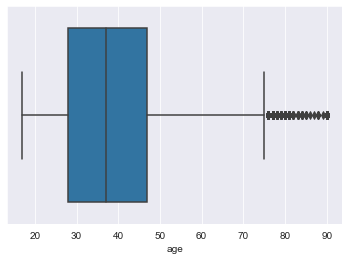

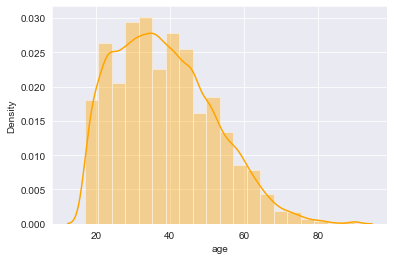

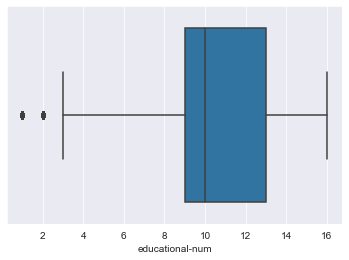

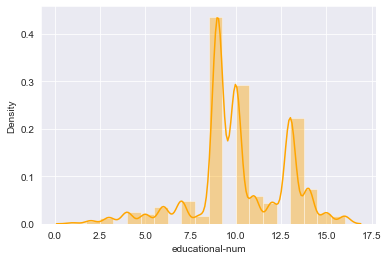

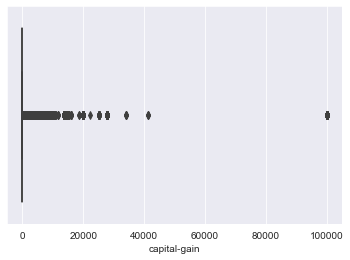

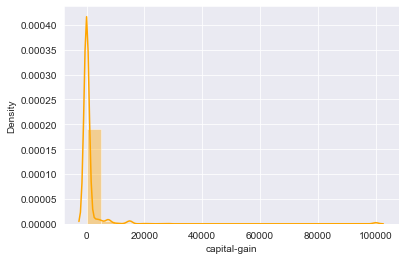

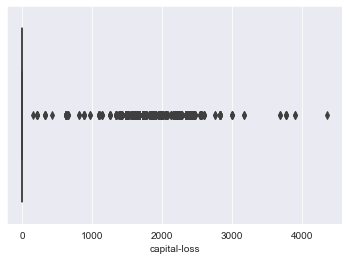

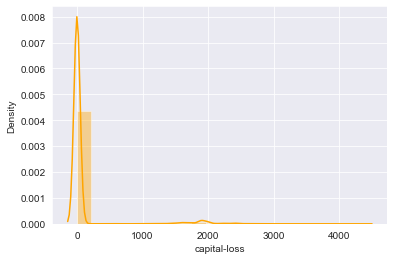

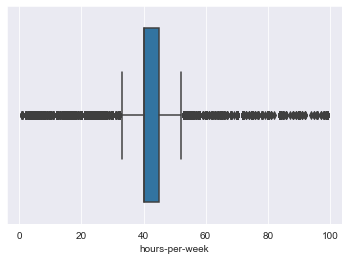

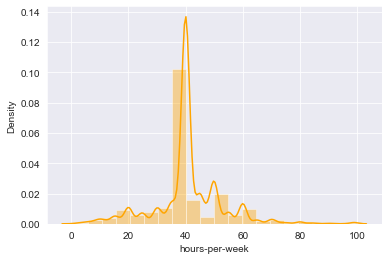

In [15]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()
    sns.distplot(df_num[i], bins= 20, color='orange')
    plt.show()

In [16]:
df_cat = df.select_dtypes(include='object')
print(df_cat.columns)
print()
print(df_cat.head())

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

   workclass     education      marital-status         occupation  \
0    Private          11th       Never-married  Machine-op-inspct   
1    Private       HS-grad  Married-civ-spouse    Farming-fishing   
2  Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3    Private  Some-college  Married-civ-spouse  Machine-op-inspct   
5    Private          10th       Never-married      Other-service   

    relationship   race gender native-country income  
0      Own-child  Black   Male  United-States  <=50K  
1        Husband  White   Male  United-States  <=50K  
2        Husband  White   Male  United-States   >50K  
3        Husband  Black   Male  United-States   >50K  
5  Not-in-family  White   Male  United-States  <=50K  


In [17]:
for i in df_cat.columns:
    print(i)
    print('_'*20)
    print('The number of unique element present : {}'.format(df_cat[i].nunique()))
    print()
    print('The counts of each element are \n{}'.format(df_cat[i].value_counts()))
    print()

workclass
____________________
The number of unique element present : 7

The counts of each element are 
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

education
____________________
The number of unique element present : 16

The counts of each element are 
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

marital-status
____________________
The number of unique element present : 7

The counts of each element are 
Married-civ-spouse       21055
Never-married            14598
Divorced             

In [18]:
income_gender_wise = df.groupby(["income","gender"])["gender"].count().to_frame()
income_gender_wise.head()

gender
income gender        
<=50K  Female   13026
       Male     20988
>50K   Female    1669
       Male      9539

In [19]:
income_race_wise = df.groupby(["income","race"])["race"].count()
income_race_wise

income  race              
<=50K   Amer-Indian-Eskimo      382
        Asian-Pac-Islander      934
        Black                  3694
        Other                   308
        White                 28696
>50K    Amer-Indian-Eskimo       53
        Asian-Pac-Islander      369
        Black                   534
        Other                    45
        White                 10207
Name: race, dtype: int64

In [20]:
income_race_gender_wise = df.groupby(["income","race","gender"])["gender"].count().to_frame()

In [21]:
income_race_gender_wise

gender
income race               gender        
<=50K  Amer-Indian-Eskimo Female     152
                          Male       230
       Asian-Pac-Islander Female     371
                          Male       563
       Black              Female    1958
                          Male      1736
       Other              Female     117
                          Male       191
       White              Female   10428
                          Male     18268
>50K   Amer-Indian-Eskimo Female      14
                          Male        39
       Asian-Pac-Islander Female      65
                          Male       304
       Black              Female     126
                          Male       408
       Other              Female       9
                          Male        36
       White              Female    1455
                          Male      8752

In [22]:
income_occupation_wise = df.groupby(["income","occupation"])["occupation"].count().to_frame()
income_occupation_wise

occupation
income occupation                   
<=50K  Adm-clerical             4784
       Armed-Forces               10
       Craft-repair             4665
       Exec-managerial          3117
       Farming-fishing          1308
       Handlers-cleaners        1911
       Machine-op-inspct        2605
       Other-service            4612
       Priv-house-serv           229
       Prof-specialty           3304
       Protective-serv           669
       Sales                    3953
       Tech-support             1009
       Transport-moving         1838
>50K   Adm-clerical              756
       Armed-Forces                4
       Craft-repair             1355
       Exec-managerial          2867
       Farming-fishing           172
       Handlers-cleaners         135
       Machine-op-inspct         365
       Other-service             196
       Priv-house-serv             3
       Prof-specialty           2704
       Protective-serv           307
       Sales                    1455
       Tech-support              411
       Transport-moving          478

In [23]:
income_occupation_gender_wise = df.groupby(["income","occupation","gender"])["gender"].count().to_frame()
income_occupation_gender_wise

gender
income occupation        gender        
<=50K  Adm-clerical      Female    3424
                         Male      1360
       Armed-Forces      Male        10
       Craft-repair      Female     283
                         Male      4382
       Exec-managerial   Female    1307
                         Male      1810
       Farming-fishing   Female      92
                         Male      1216
       Handlers-cleaners Female     245
                         Male      1666
       Machine-op-inspct Female     765
                         Male      1840
       Other-service     Female    2568
                         Male      2044
       Priv-house-serv   Female     215
                         Male        14
       Prof-specialty    Female    1631
                         Male      1673
       Protective-serv   Female     107
                         Male       562
       Sales             Female    1788
                         Male      2165
       Tech-support      Female     489
                         Male       520
       Transport-moving  Female     112
                         Male      1726
>50K   Adm-clerical      Female     306
                         Male       450
       Armed-Forces      Male         4
       Craft-repair      Female      32
                         Male      1323
       Exec-managerial   Female     417
                         Male      2450
       Farming-fishing   Female       3
                         Male       169
       Handlers-cleaners Female       8
                         Male       127
       Machine-op-inspct Female      28
                         Male       337
       Other-service     Female      74
                         Male       122
       Priv-house-serv   Female       3
       Prof-specialty    Female     572
                         Male      2132
       Protective-serv   Female      15
                         Male       292
       Sales             Female     133
                         Male      1322
       Tech-support      Female      65
                         Male       346
       Transport-moving  Female      13
                         Male       465

In [24]:
income_workclass_wise = df.groupby(["income","workclass"])["workclass"].count().to_frame()
income_workclass_wise

workclass
income workclass                  
<=50K  Federal-gov             857
       Local-gov              2185
       Private               26056
       Self-emp-inc            734
       Self-emp-not-inc       2737
       State-gov              1426
       Without-pay              19
>50K   Federal-gov             549
       Local-gov               915
       Private                7251
       Self-emp-inc            912
       Self-emp-not-inc       1059
       State-gov               520
       Without-pay               2

In [25]:
income_workclass_gender_wise = df.groupby(["income","workclass","gender"])["gender"].count().to_frame()
income_workclass_gender_wise

gender
income workclass        gender        
<=50K  Federal-gov      Female     363
                        Male       494
       Local-gov        Female    1021
                        Male      1164
       Private          Female   10344
                        Male     15712
       Self-emp-inc     Female     139
                        Male       595
       Self-emp-not-inc Female     496
                        Male      2241
       State-gov        Female     657
                        Male       769
       Without-pay      Female       6
                        Male        13
>50K   Federal-gov      Female      82
                        Male       467
       Local-gov        Female     223
                        Male       692
       Private          Female    1084
                        Male      6167
       Self-emp-inc     Female      60
                        Male       852
       Self-emp-not-inc Female     121
                        Male       938
       State-gov        Female      98
                        Male       422
       Without-pay      Female       1
                        Male         1

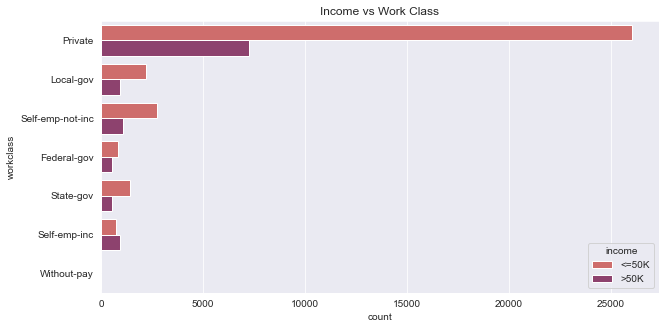

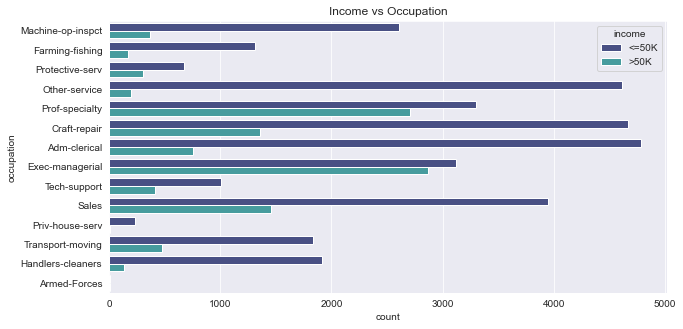

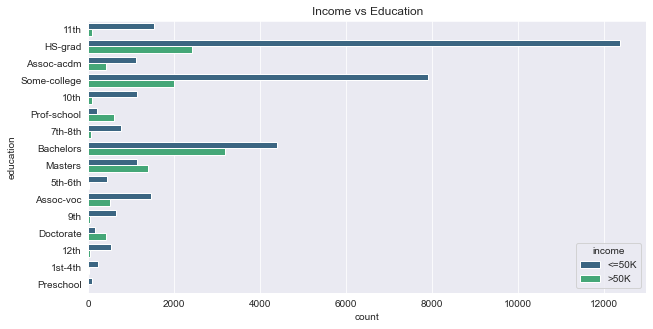

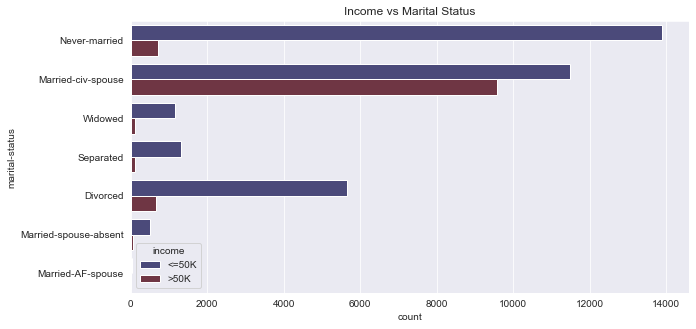

In [26]:

plt.figure(figsize=(10,5))
sns.countplot( data = df_cat, y='workclass', hue='income', palette="flare")
plt.title('Income vs Work Class')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data = df_cat,y='occupation', hue='income',palette="mako")
plt.title('Income vs Occupation')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data = df_cat,y='education', hue='income',palette="viridis")
plt.title('Income vs Education')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data = df_cat,y='marital-status', hue='income',palette="icefire")
plt.title('Income vs Marital Status')
plt.show()

<AxesSubplot:xlabel='income', ylabel='age'>

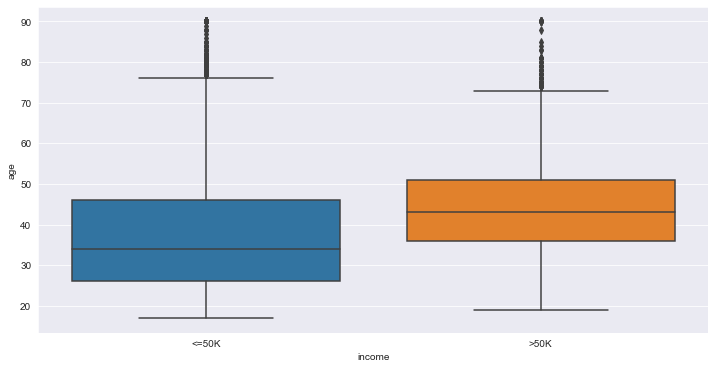

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='age')

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

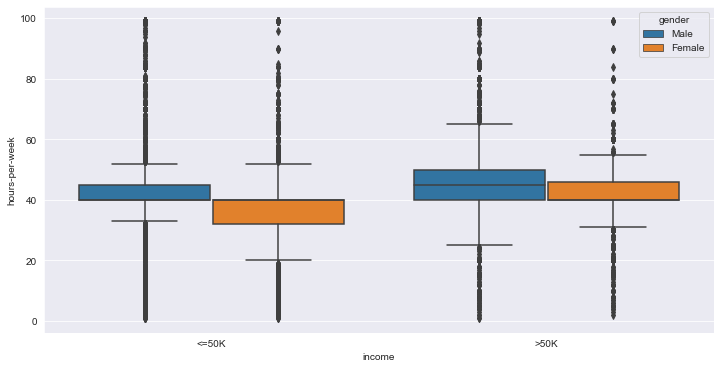

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='hours-per-week', hue='gender')

<AxesSubplot:xlabel='occupation', ylabel='hours-per-week'>

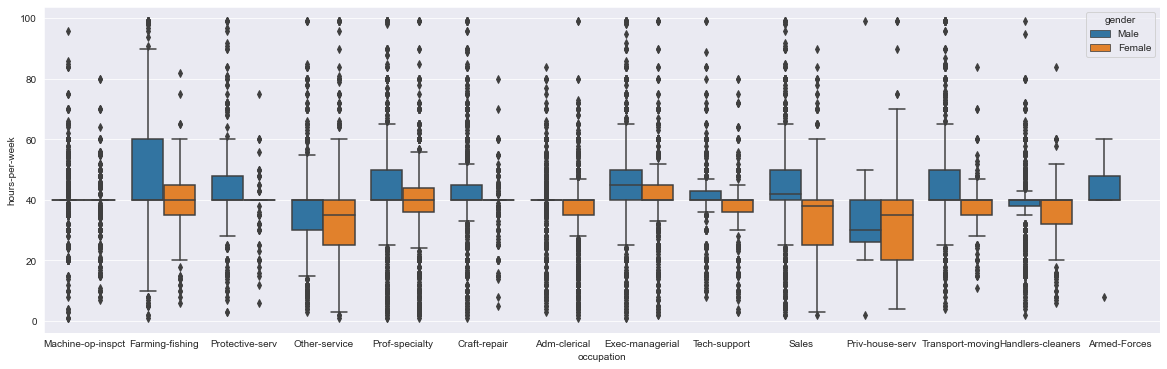

In [29]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='occupation', y='hours-per-week', hue='gender')

<AxesSubplot:xlabel='occupation', ylabel='hours-per-week'>

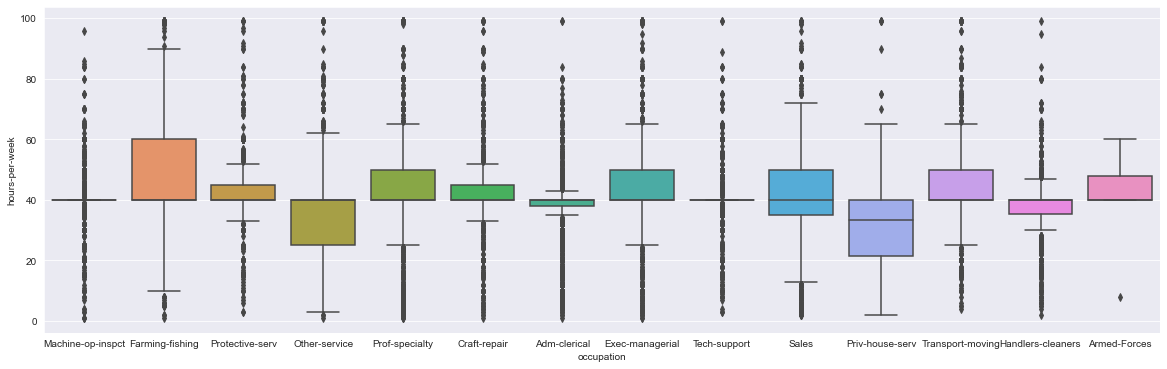

In [30]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='occupation', y='hours-per-week')

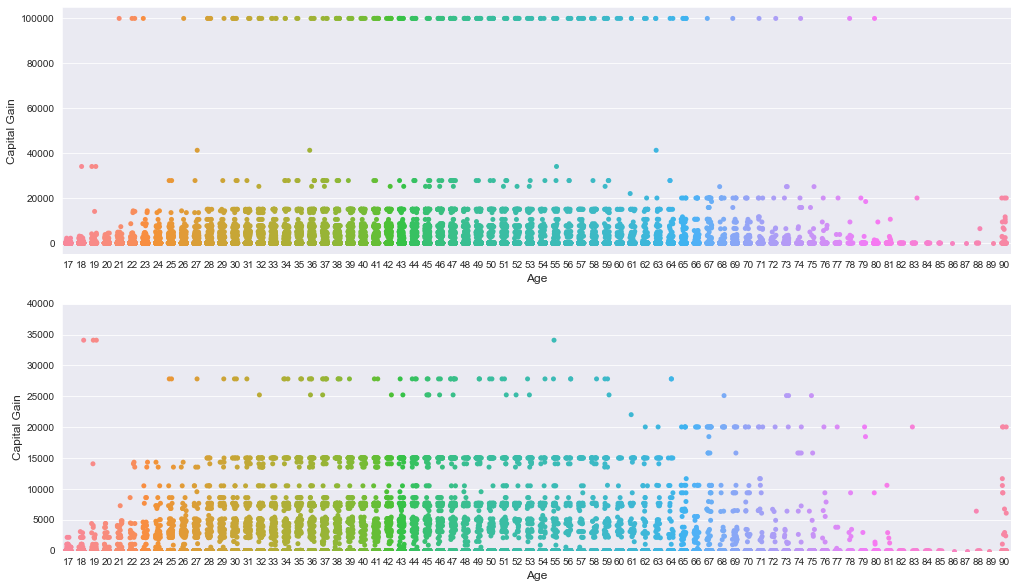

In [31]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = df,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital-gain', data = df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

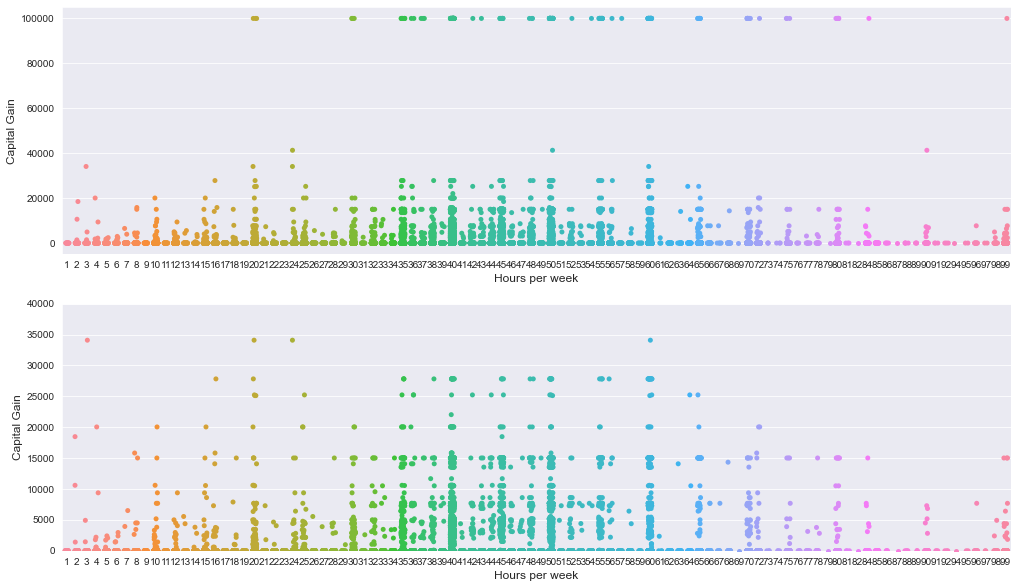

In [32]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours-per-week', 'capital-gain', data = df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours-per-week', 'capital-gain', data = df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

In [33]:
df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [34]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.0,37.0,47.0,90.0
educational-num,45222.0,10.118460,2.552881,1.0,9.0,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


In [35]:
# drop rows with age 90
print("Number of observation before removing:", df_num.shape)
df_num.drop(labels = df[df['age'] == 90].index, axis = 0, inplace =True)
print("Number of observation after removing:", df_num.shape)

Number of observation before removing: (45222, 5)
Number of observation after removing: (45176, 5)


In [36]:
#drop rows with capital gain = 99999
print("Number of observation before removing:", df_num.shape)
df_num.drop(labels = df[df['capital-gain'] == 99999].index, axis = 0, inplace =True)
print("Number of observation after removing:", df_num.shape)

Number of observation before removing: (45176, 5)
Number of observation after removing: (44947, 5)


In [37]:
df_cat.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

### Preparing the data

In [38]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
            'Never-married','Separated','Widowed'],
            ['not married','married','married','married','not married','not married','not married'], 
            inplace = True)

df.replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov','State-gov',
                'Without-pay', 'Never-worked'],
                ['Private','inc','inc','gov','gov','gov','Without-pay','Never-worked'], 
                inplace = True)

df.replace(['<=50K','>50K'],[0,1], inplace=True)

In [39]:
df_cat = df.select_dtypes(include='object')

In [40]:
for i in df_cat.columns:
    print(i)
    print('_'*20)
    print('The number of unique element present : {}'.format(df_cat[i].nunique()))
    print()
    print('The counts of each element are \n{}'.format(df_cat[i].value_counts()))
    print()

workclass
____________________
The number of unique element present : 4

The counts of each element are 
Private        33307
gov             6452
inc             5442
Without-pay       21
Name: workclass, dtype: int64

education
____________________
The number of unique element present : 16

The counts of each element are 
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

marital-status
____________________
The number of unique element present : 2

The counts of each element are 
not married    23583
married        21639
Name: marital-status, dtype: int64

occupation
____________________
The number of unique element present : 14

The counts of each element a

In [41]:
from sklearn.preprocessing import LabelEncoder
scaler_label=LabelEncoder()
df_cat_label=df_cat.apply(LabelEncoder().fit_transform)

df_cat_label.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,0,1,1,6,3,2,1,38
1,0,11,0,4,0,4,1,38
2,2,7,0,10,0,4,1,38
3,0,15,0,6,0,2,1,38
5,0,0,1,7,1,4,1,38


In [42]:
df_num = df.select_dtypes(exclude='object')

In [43]:
df1=pd.concat([df_cat_label,df_num], axis=1, join='inner')

In [44]:
df1.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,0,1,1,6,3,2,1,38,25,226802,7,0,0,40,0
1,0,11,0,4,0,4,1,38,38,89814,9,0,0,50,0
2,2,7,0,10,0,4,1,38,28,336951,12,0,0,40,1
3,0,15,0,6,0,2,1,38,44,160323,10,7688,0,40,1
5,0,0,1,7,1,4,1,38,34,198693,6,0,0,30,0


In [45]:
df1.shape

(45222, 15)

In [46]:
df1.drop(['fnlwgt'], axis=1, inplace=True)

In [47]:
df1.isnull().sum()

workclass          0
education          0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
native-country     0
age                0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

In [48]:
x=df1.drop(['income'], axis=1)
y=df1.income

In [49]:
x[:5]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0,1,1,6,3,2,1,38,25,7,0,0,40
1,0,11,0,4,0,4,1,38,38,9,0,0,50
2,2,7,0,10,0,4,1,38,28,12,0,0,40
3,0,15,0,6,0,2,1,38,44,10,7688,0,40
5,0,0,1,7,1,4,1,38,34,6,0,0,30


In [50]:
y[:5]

0    0
1    0
2    1
3    1
5    0
Name: income, dtype: int64

In [51]:
from sklearn.preprocessing import Normalizer
n=Normalizer()
data=n.fit_transform(x)

In [52]:
data[:5]

array([[0.00000000e+00, 1.62865585e-02, 1.62865585e-02, 9.77193513e-02,
        4.88596756e-02, 3.25731171e-02, 1.62865585e-02, 6.18889225e-01,
        4.07163964e-01, 1.14005910e-01, 0.00000000e+00, 0.00000000e+00,
        6.51462342e-01],
       [0.00000000e+00, 1.46692748e-01, 0.00000000e+00, 5.33428173e-02,
        0.00000000e+00, 5.33428173e-02, 1.33357043e-02, 5.06756765e-01,
        5.06756765e-01, 1.20021339e-01, 0.00000000e+00, 0.00000000e+00,
        6.66785217e-01],
       [3.10759882e-02, 1.08765959e-01, 0.00000000e+00, 1.55379941e-01,
        0.00000000e+00, 6.21519765e-02, 1.55379941e-02, 5.90443777e-01,
        4.35063835e-01, 1.86455929e-01, 0.00000000e+00, 0.00000000e+00,
        6.21519765e-01],
       [0.00000000e+00, 1.95100438e-03, 0.00000000e+00, 7.80401752e-04,
        0.00000000e+00, 2.60133917e-04, 1.30066959e-04, 4.94254443e-03,
        5.72294618e-03, 1.30066959e-03, 9.99954779e-01, 0.00000000e+00,
        5.20267835e-03],
       [0.00000000e+00, 0.00000000e+

In [53]:
X=pd.DataFrame(data=data , columns=x.columns)
X.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.000000,0.016287,0.016287,0.097719,0.048860,0.032573,0.016287,0.618889,0.407164,0.114006,0.000000,0.0,0.651462
1,0.000000,0.146693,0.000000,0.053343,0.000000,0.053343,0.013336,0.506757,0.506757,0.120021,0.000000,0.0,0.666785
2,0.031076,0.108766,0.000000,0.155380,0.000000,0.062152,0.015538,0.590444,0.435064,0.186456,0.000000,0.0,0.621520
3,0.000000,0.001951,0.000000,0.000780,0.000000,0.000260,0.000130,0.004943,0.005723,0.001301,0.999955,0.0,0.005203
4,0.000000,0.000000,0.016657,0.116602,0.016657,0.066630,0.016657,0.632982,0.566352,0.099944,0.000000,0.0,0.499722


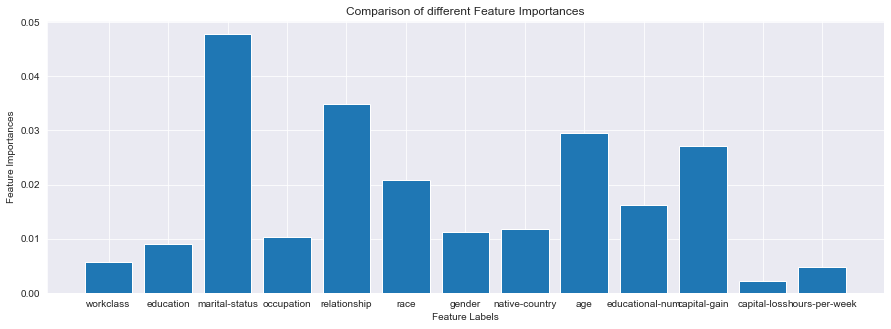

In [54]:

#features selection. 
from sklearn.ensemble import ExtraTreesClassifier
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.figure(figsize=(15,5))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [55]:

df2= {
    "column_name" : X.columns,
    "features_score" : feature_importance_normalized

}

df_new=pd.DataFrame(df2)
df_new

,column_name,features_score
0,workclass,0.005617
1,education,0.008948
2,marital-status,0.047829
3,occupation,0.010256
4,relationship,0.034909
5,race,0.020846
6,gender,0.011210
7,native-country,0.011808
8,age,0.029501
9,educational-num,0.016164


In [56]:
df_new_feature=df_new[df_new['features_score'] > 0.01]
df_new_feature

,column_name,features_score
2,marital-status,0.047829
3,occupation,0.010256
4,relationship,0.034909
5,race,0.020846
6,gender,0.011210
7,native-country,0.011808
8,age,0.029501
9,educational-num,0.016164
10,capital-gain,0.027178


In [57]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36177, 13), (9045, 13), (36177,), (9045,))

0.7829740187949144


[[6347  468]
 [1495  735]]


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      6815
           1       0.61      0.33      0.43      2230

    accuracy                           0.78      9045
   macro avg       0.71      0.63      0.65      9045
weighted avg       0.76      0.78      0.76      9045





Text(34.0, 0.5, 'Predicted')

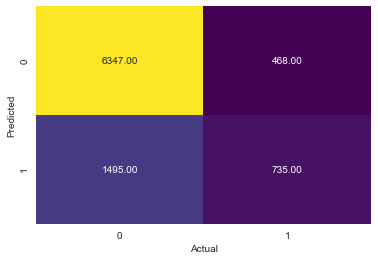

In [59]:

# applying logistic regression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
clf_logit = LogisticRegression()
clf_logit.fit(X_train, y_train)
#predict 
y_test_pred = clf_logit.predict(X_test)
#accuracy 
from sklearn import metrics
LR_score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))
print('\n')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
print('\n')
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cbar = False, cmap="viridis")
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [60]:
#Logistic regression using cv
import numpy as np
from sklearn.model_selection import cross_val_score
score=cross_val_score(LogisticRegression(), X_train, y_train, cv=10)
print(score)
print('the average score is : {}'. format(np.mean(score)))

[0.76699834 0.77722499 0.77888336 0.76755113 0.78413488 0.78524046
 0.7761194  0.78020459 0.77550456 0.78048106]
the average score is : 0.7772342783364534


[14:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8642343836373687


[[6371  444]
 [ 784 1446]]


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6815
           1       0.77      0.65      0.70      2230

    accuracy                           0.86      9045
   macro avg       0.83      0.79      0.81      9045
weighted avg       0.86      0.86      0.86      9045





Text(34.0, 0.5, 'Predicted')

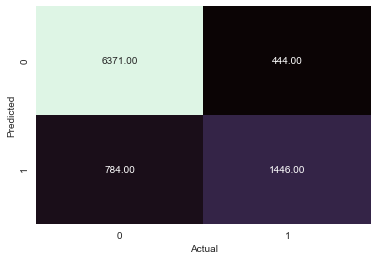

In [61]:
#XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
#predict 
y_test_pred = model.predict(X_test)
#accuracy 
from sklearn import metrics
XGB_score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))

print('\n')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
print('\n')
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cbar = False, cmap="mako")
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [62]:
#XGBClassifier using cv
import numpy as np
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGBClassifier(), X_train, y_train, cv=5)
print(score)
print('the average score is : {}'. format(np.mean(score)))

[14:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Random-Forest classifier

0.8576008844665561


[[6565  250]
 [1038 1192]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6815
           1       0.83      0.53      0.65      2230

    accuracy                           0.86      9045
   macro avg       0.85      0.75      0.78      9045
weighted avg       0.85      0.86      0.85      9045



No : ROC AUC=0.500
rfc1: ROC AUC=0.911


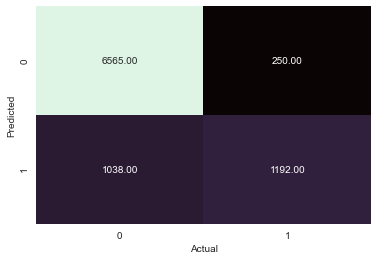

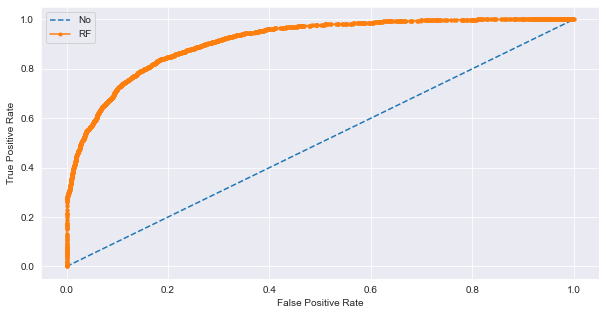

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(random_state=42,
                            max_features='sqrt',
                            n_estimators= 100,
                            max_depth=8, 
                            criterion='gini')

rfc1.fit(X_train, y_train)


#predict 
y_test_pred = rfc1.predict(X_test)
#accuracy 
from sklearn import metrics
RF_score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))

print('\n')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
print('\n')
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cbar = False, cmap="mako")
plt.xlabel('Actual')
plt.ylabel('Predicted')

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_prob=[0 for i in range(len(y_test))]
#predicting the probality
rfc1_prob=rfc1.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc1_prob = rfc1_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_prob)
rfc1_auc = roc_auc_score(y_test, rfc1_prob)

# summarize scores
print('No : ROC AUC=%.3f' % (ns_auc))
print('rfc1: ROC AUC=%.3f' % (rfc1_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
rfc1_fpr, rfc1_tpr, _ = roc_curve(y_test, rfc1_prob)
# plot the roc curve for the model
plt.figure(figsize=(10,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--',label='No')
plt.plot(rfc1_fpr, rfc1_tpr, marker='.',label='RF')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameter_grid = {'max_depth': [5,10,20,30],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = parameter_grid,
                          cv =3)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.8418608508168172
Best params: {'criterion': 'gini', 'max_depth': 10}


0.821779988944168


[[6583  232]
 [1380  850]]


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6815
           1       0.79      0.38      0.51      2230

    accuracy                           0.82      9045
   macro avg       0.81      0.67      0.70      9045
weighted avg       0.82      0.82      0.80      9045



No : ROC AUC=0.500
dt: ROC AUC=0.854


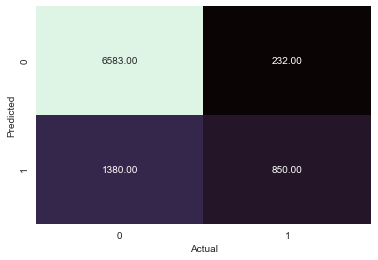

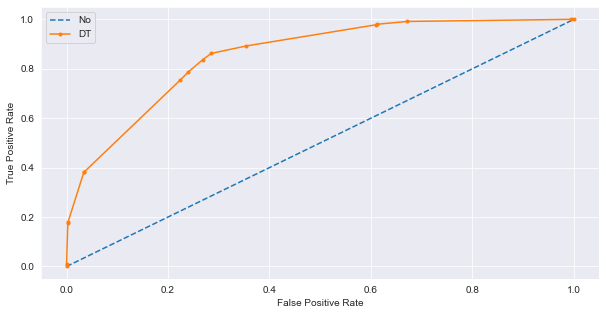

In [65]:
dt=DecisionTreeClassifier(random_state=15,
                            max_features=6,
                            max_depth=4,
                             
                            criterion='gini')

dt.fit(X_train, y_train)


#predict 
y_test_pred = dt.predict(X_test)
#accuracy 
from sklearn import metrics
DT_score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))

print('\n')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
print('\n')
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cbar = False, cmap="mako")
plt.xlabel('Actual')
plt.ylabel('Predicted')

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_prob=[0 for i in range(len(y_test))]
#predicting the probality
dt_prob=dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_prob = dt_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_prob)
dt_auc = roc_auc_score(y_test, dt_prob)

# summarize scores
print('No : ROC AUC=%.3f' % (ns_auc))
print('dt: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
# plot the roc curve for the model
plt.figure(figsize=(10,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--',label='No')
plt.plot(dt_fpr, dt_tpr, marker='.',label='DT')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

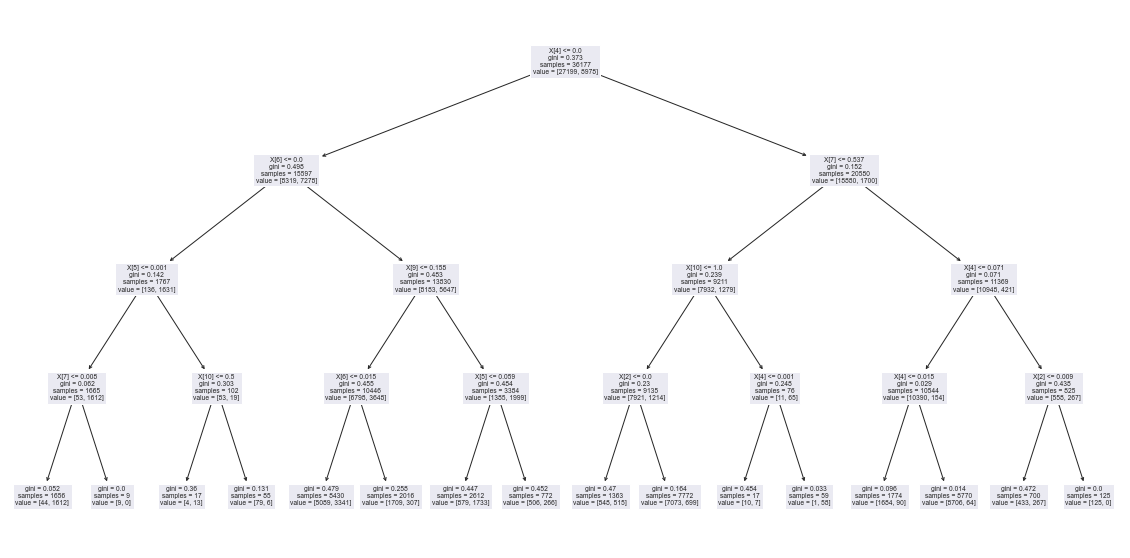

In [66]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt);

### Gaussain Naive Bayes

0.7677169707020454


[[6235  580]
 [1521  709]]


              precision    recall  f1-score   support

           0       0.80      0.91      0.86      6815
           1       0.55      0.32      0.40      2230

    accuracy                           0.77      9045
   macro avg       0.68      0.62      0.63      9045
weighted avg       0.74      0.77      0.74      9045



No : ROC AUC=0.500
dt: ROC AUC=0.797


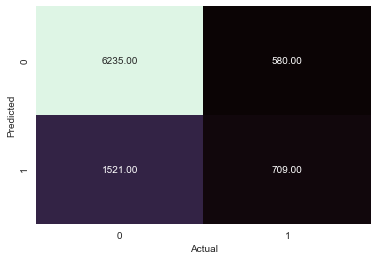

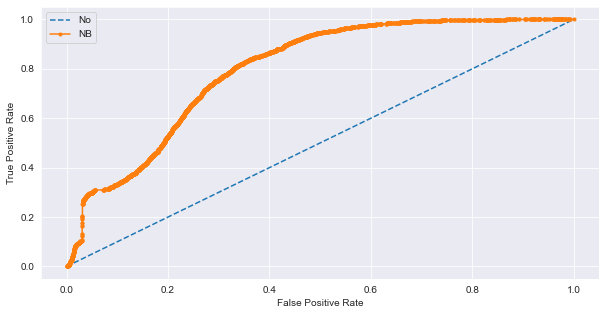

In [67]:
# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

#predict 
y_test_pred = model.predict(X_test)
#accuracy 
from sklearn import metrics
NB_score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))

print('\n')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
print('\n')
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cbar = False, cmap="mako")
plt.xlabel('Actual')
plt.ylabel('Predicted')

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_prob=[0 for i in range(len(y_test))]
#predicting the probality
NB_prob=model.predict_proba(X_test)
# keep probabilities for the positive outcome only
NB_prob = NB_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_prob)
NB_auc = roc_auc_score(y_test, NB_prob)

# summarize scores
print('No : ROC AUC=%.3f' % (ns_auc))
print('dt: ROC AUC=%.3f' % (NB_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_prob)
# plot the roc curve for the model
plt.figure(figsize=(10,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--',label='No')
plt.plot(NB_fpr, NB_tpr, marker='.',label='NB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### SVM

In [68]:
# Import Library of Support Vector Machine model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a Support Vector Classifier


# Hyperparameter Optimization
parameters = [
            {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
            {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
            ]

grid_search = GridSearchCV(SVC(), param_grid = parameters,
                          cv =3)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7834259336042236
Best params: {'C': 1000, 'kernel': 'linear'}


0.7881702598120509


[[6130  685]
 [1231  999]]


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      6815
           1       0.59      0.45      0.51      2230

    accuracy                           0.79      9045
   macro avg       0.71      0.67      0.69      9045
weighted avg       0.77      0.79      0.78      9045





Text(34.0, 0.5, 'Predicted')

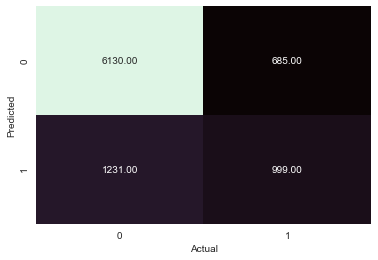

In [69]:
# Import Library of Support Vector Machine model
from sklearn.svm import SVC

model=SVC(C= 1000, 
            kernel =  'linear')

# Train the model using the training sets 
model.fit(X_train,y_train)

#predict 
y_test_pred = model.predict(X_test)
#accuracy 
from sklearn import metrics
SVM_score=metrics.accuracy_score(y_test, y_test_pred)
print(metrics.accuracy_score(y_test, y_test_pred))

print('\n')
print(confusion_matrix(y_test,y_test_pred))
print('\n')
print(classification_report(y_test,y_test_pred))
print('\n')
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, fmt = '.2f', cbar = False, cmap="mako")
plt.xlabel('Actual')
plt.ylabel('Predicted')

### KNN

In [70]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(knn.score(X_test,y_test))

[[5808 1007]
 [ 851 1379]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6815
           1       0.58      0.62      0.60      2230

    accuracy                           0.79      9045
   macro avg       0.73      0.74      0.73      9045
weighted avg       0.80      0.79      0.80      9045

0.7945826423438364


Text(0, 0.5, 'Error Rate')

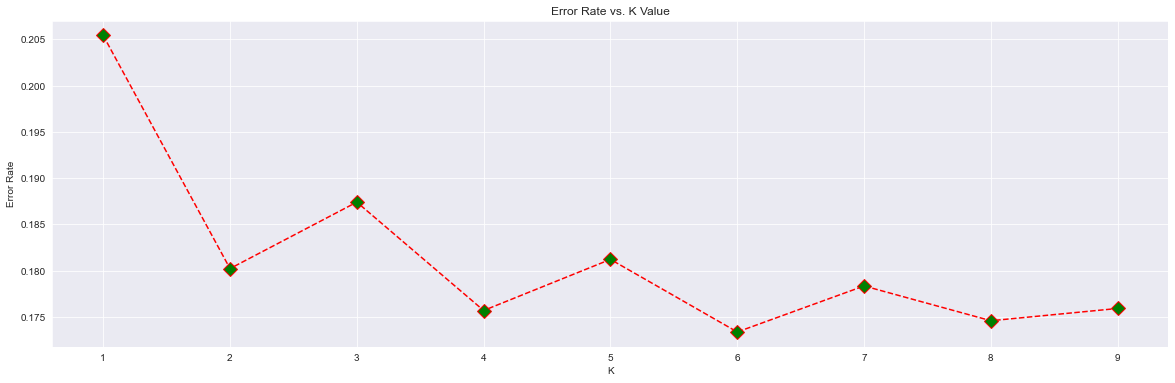

In [71]:
KNN_error_rate = []
import numpy as np
# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    KNN_error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20,6))
plt.plot(range(1,10),KNN_error_rate,color='red', linestyle='dashed', marker='D',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

[[6366  449]
 [1119 1111]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6815
           1       0.71      0.50      0.59      2230

    accuracy                           0.83      9045
   macro avg       0.78      0.72      0.74      9045
weighted avg       0.82      0.83      0.82      9045

0.8266445550027639
No Skill: ROC AUC=0.500
KNN: ROC AUC=0.850


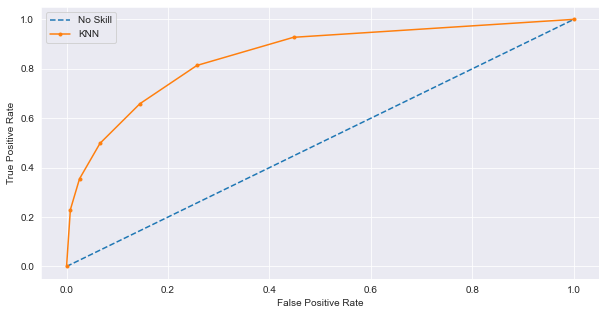

In [72]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
KNN_score=metrics.accuracy_score(y_test, y_test_pred)
print(knn.score(X_test,y_test))
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_prob=[0 for i in range(len(y_test))]
#predicting the probality
knn_prob=knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_prob = knn_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_prob)
knn_auc = roc_auc_score(y_test, knn_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_prob)
# plot the roc curve for the model
plt.figure(figsize=(10,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [73]:
LR_score, NB_score, DT_score, RF_score, SVM_score, KNN_score, XGB_score


(0.7829740187949144,
 0.7677169707020454,
 0.821779988944168,
 0.8576008844665561,
 0.7881702598120509,
 0.7881702598120509,
 0.8642343836373687)

In [79]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [LR_score, NB_score, DT_score, RF_score, SVM_score, KNN_score, XGB_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,XGBoost,0.864234
3,Random Forest,0.857601
2,Decision Tree,0.821780
4,Support Vector Machines,0.788170
5,K - Nearest Neighbors,0.788170
0,Logistic Regression,0.782974
1,Naive Bayes,0.767717


<AxesSubplot:xlabel='Model', ylabel='Score'>

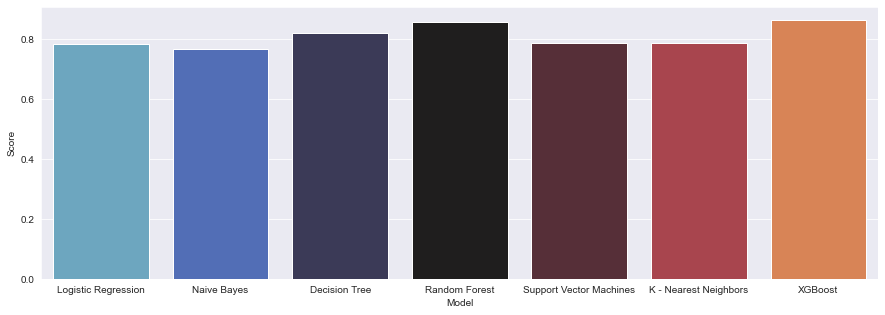

In [80]:
plt.figure(figsize=(15,5))
sns.barplot(x='Model' , y='Score', data=models, palette="icefire")

## Therefore, we can conclude that XGBOOST works the best on adult dataset